In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from typing import List

In [2]:
seq_len = 30
batch_size = 128
train_test_split = 0.99
nr_articles = 350  # how many articles should be loaded from the dataset
nr_source_lines = 130000  # how many lines of source code should be loaded (python source code dataset)

#### Some helper methods

In [3]:
def get_one_hot_encoded(char):
    one_hot = torch.zeros(len(chars))
    one_hot[chars2idx[char]] = 1
    return one_hot

def one_hot_encoded_to_char(one_hot):
    idx = int((one_hot == 1).nonzero()[0][0])
    return idx2chars[idx]

In [4]:
def get_train_test_split(data: str, train_test_split: float, print_summary=True):
    train_text = in_text[:int(train_test_split*len(in_text))]
    test_text = in_text[int(train_test_split*len(in_text)):]
    print(f'Train size: {len(train_text)} characters')
    print(f'Test size: {len(test_text)} characters')
    if print_summary:
        print(f'Read {nr_articles} articles with a total of {len(in_text)} characters.')
    return train_text, test_text

#### German news dataset

In [5]:
in_text = []
with open('data/Ten_Thousand_German_News_Articles/train.csv') as in_file:
    for line in in_file.readlines()[:nr_articles]:
        article = list(itertools.chain(line.split(';')[1:]))
        in_text += article
    in_text = "".join(in_text)
train_text, test_text = get_train_test_split(in_text, train_test_split)

Train size: 884145 characters
Test size: 8931 characters
Read 350 articles with a total of 893076 characters.


#### English news dataset (Huffington Post)

In [6]:
news_data = pd.read_csv('data/english_news/articles1.csv', engine='python', error_bad_lines=False, encoding='utf-8', nrows=nr_articles)
in_text = news_data['content'].str.cat(sep=' ')
train_text, test_text = get_train_test_split(in_text, train_test_split)

Train size: 2361849 characters
Test size: 23858 characters
Read 350 articles with a total of 2385707 characters.


#### Python source code

In [7]:
in_text = []
with open('data/python_code/python.txt', encoding='utf-8') as in_file:
    for line in in_file.readlines()[:nr_source_lines]:
        in_text += line
    in_text = "".join(in_text)
train_text, test_text = get_train_test_split(in_text, train_test_split, print_summary=False)

Train size: 5281322 characters
Test size: 53347 characters


In [8]:
train_text_in = train_text[:len(train_text) - (len(train_text)%seq_len)-1]
train_text_out = train_text[1:len(train_text) - (len(train_text)%seq_len)]
test_text_in = test_text[:len(test_text) - (len(test_text)%seq_len)-1]
test_text_out = test_text[1:len(test_text) - (len(test_text)%seq_len)]
print(f'len of train_text_in {len(train_text_in)}')
print(f'len of train_text_out {len(train_text_out)}')
print(f'len of test_text_in {len(test_text_in)}')
print(f'len of test_text_out {len(test_text_out)}')
chars = set(train_text + test_text)
nr_chars = len(chars)
print(f'nr. of unique chars: {nr_chars}')
idx2chars = {}
chars2idx = {}
for i, char in enumerate(chars):
    idx2chars[i] = char
    chars2idx[char] = i

train_text_encoded_in = torch.zeros((len(train_text_in), len(chars)))
train_text_encoded_out = torch.zeros((len(train_text_out), len(chars)))
test_text_encoded_in = torch.zeros((len(test_text_in), len(chars)))
test_text_encoded_out = torch.zeros((len(test_text_out), len(chars)))
print(train_text_encoded_in.shape)
print(train_text_encoded_out.shape)
print(test_text_encoded_in.shape)
print(test_text_encoded_out.shape)
for i, char in enumerate(train_text_in):
    train_text_encoded_in[i][chars2idx[char]] = 1

for i, char in enumerate(train_text_out):
    train_text_encoded_out[i][chars2idx[char]] = 1

for i, char in enumerate(test_text_in):
    test_text_encoded_in[i][chars2idx[char]] = 1

for i, char in enumerate(test_text_out):
    test_text_encoded_out[i][chars2idx[char]] = 1

# print(one_hot_encoded_to_char(train_text_encoded_in[0]))
# print(one_hot_encoded_to_char(train_text_encoded_out[0]))
# print(train_text_encoded_in[0])
# print(one_hot_encoded_to_char(test_text_encoded_in[0]))
# print(one_hot_encoded_to_char(test_text_encoded_out[0]))

len of train_text_in 5281319
len of train_text_out 5281319
len of test_text_in 53339
len of test_text_out 53339
nr. of unique chars: 333
torch.Size([5281319, 333])
torch.Size([5281319, 333])
torch.Size([53339, 333])
torch.Size([53339, 333])


In [9]:
print(train_text[:50])
print(test_text[:50])



test_cases = [dict(p1Points=0, p2Points=0, score
eploy")):
                return package_names
   


In [10]:
get_one_hot_encoded('A')

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [11]:
print(train_text_encoded_in.shape)
print(test_text_encoded_in.shape)

torch.Size([5281319, 333])
torch.Size([53339, 333])


In [12]:
nr_batches_train = int(np.floor(train_text_encoded_in.shape[0] / seq_len / batch_size))
nr_samples_train = nr_batches_train * batch_size * seq_len
nr_batches_test = int(np.floor(test_text_encoded_in.shape[0] / seq_len / batch_size))
nr_samples_test = nr_batches_test * batch_size * seq_len

train_text_encoded_in = train_text_encoded_in[:nr_samples_train].reshape((nr_batches_train, batch_size, seq_len, nr_chars))
train_text_encoded_out = train_text_encoded_out[:nr_samples_train].reshape((nr_batches_train, batch_size, seq_len, nr_chars))
test_text_encoded_in = test_text_encoded_in[:nr_samples_test].reshape((nr_batches_test, batch_size, seq_len, nr_chars))
test_text_encoded_out = test_text_encoded_out[:nr_samples_test].reshape((nr_batches_test, batch_size, seq_len, nr_chars))

print(one_hot_encoded_to_char(train_text_encoded_in[0][0][0]))
print(one_hot_encoded_to_char(train_text_encoded_out[0][0][0]))
print(one_hot_encoded_to_char(test_text_encoded_in[0][0][0]))
print(one_hot_encoded_to_char(test_text_encoded_out[0][0][0]))





e
p


In [13]:
print(train_text_encoded_in.shape)
print(test_text_encoded_in.shape)

torch.Size([1375, 128, 30, 333])
torch.Size([13, 128, 30, 333])


**LSTM input shape:** input and output tensors are provided as (batch, seq, feature)

Shape: (batch, seq, feature)

In [14]:
class LSTMLanguageModel(nn.Module):

    def __init__(self, hidden_dim, vocab_size, batch_size):
        super(LSTMLanguageModel, self).__init__()
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.hidden_dim = hidden_dim
        self.nb_lstm_layers = 1
        self.batch_size = batch_size
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size=vocab_size, hidden_size=hidden_dim, num_layers=1, batch_first=True)

        # The linear layer that maps from hidden state space to character space
        self.hidden2char = nn.Linear(hidden_dim, vocab_size, bias=True)

    def forward(self, sequence):
        lstm_out, hidden = self.lstm(sequence)
        char_pred = self.hidden2char(lstm_out)
        return char_pred, hidden

    def init_hidden(self):
        # the weights are of the form (nb_layers, batch_size, hidden_dim)
        hidden_a = torch.randn(self.nb_lstm_layers, self.batch_size, self.hidden_dim)
        hidden_b = torch.randn(self.nb_lstm_layers, self.batch_size, self.hidden_dim)

        hidden_a = hidden_a.to(self.device)
        hidden_b = hidden_b.to(self.device)

        hidden_a = Variable(hidden_a)
        hidden_b = Variable(hidden_b)

        return (hidden_a, hidden_b)

In [30]:
def generate(model):
    test_text = "import numpy "  # edit if necessary

    test_text_encoded = torch.zeros((1, seq_len, len(chars)))
    start_enumeration = max(seq_len-len(test_text), 0)
    for i, c in enumerate(test_text, start=start_enumeration):
        test_text_encoded[0][i][chars2idx[c]] = 1
    
    def get_most_probable_char_from_one_hot(one_hot):
        idx = one_hot.argmax().item()
        return idx2chars[idx]

    nr_of_chars_to_generate = 1000
    with torch.no_grad():
        model.eval()
        model.init_hidden()
        test_text_encoded = test_text_encoded.to(device)
        pred, hidden = model(test_text_encoded)
        print(test_text, end='')
        cur_text_encoded = test_text_encoded.to(device)
        for i in range(nr_of_chars_to_generate):
            pred, hidden = model(cur_text_encoded)
            # print(test_text_encoded)
            print(get_most_probable_char_from_one_hot(pred[0][-1]), end='')
            pred_one_hot = torch.zeros(1, len(chars)).to(device)
            pred_one_hot[0][pred[0][-1].argmax().item()] = 1
            test_text_encoded[0] = torch.cat((test_text_encoded[0][1:], pred_one_hot))

In [16]:
hidden_dim = 896
model = LSTMLanguageModel(hidden_dim=hidden_dim, vocab_size=len(chars), batch_size=batch_size)
loss_fn = nn.CrossEntropyLoss()
print(model)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_mem = []
loss_per_epoch = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
generate_text_after_epochs = [1, 3, 5, 8, 10, 12, 15, 20, 25, 30, 40, 45, 50]
nr_epochs = 50
print_loss_every_n_batches = 50
for epoch in range(1, nr_epochs+1):
    model.train()
    model.init_hidden()
    print(f'epoch {epoch}...')
    running_loss = 0.0
    i = 1
    losses_cur_epoch = []
    for sequence_in, sequence_out in zip(train_text_encoded_in, train_text_encoded_out):
        optimizer.zero_grad()
        model.zero_grad()
        sequence_in = sequence_in.to(device)
        sequence_out = sequence_out.to(device)
        char_predictions, hidden = model(sequence_in)
        loss = 0.0
        for batch_pred, batch_ground in zip(char_predictions.squeeze(), sequence_out.argmax(dim=2).squeeze()):
            loss += loss_fn(batch_pred, batch_ground)

        loss.backward()
        optimizer.step()
        cur_loss = loss.item()/batch_size
        loss_mem.append(cur_loss)
        losses_cur_epoch.append(cur_loss)
        running_loss += loss.item()
        if i % print_loss_every_n_batches == print_loss_every_n_batches-1:    # print every n mini-batches
            progress = 100*(i/len(train_text_encoded_in))
            print(f'[{epoch}, {progress:.2f}%] loss: {running_loss / print_loss_every_n_batches / batch_size}')
            running_loss = 0.0
        i += 1
    loss_per_epoch.append(np.average(losses_cur_epoch))
    if epoch in generate_text_after_epochs:
        print(f'\n\n text generation after epoch {epoch} \n')
        generate(model)
        print('\n\n\n')

LSTMLanguageModel(
  (lstm): LSTM(333, 896, batch_first=True)
  (hidden2char): Linear(in_features=896, out_features=333, bias=True)
)
cuda:0
epoch 1...
[1, 3.56%] loss: 3.782005352973938
[1, 7.20%] loss: 3.674993805885315
[1, 10.84%] loss: 3.497845950126648
[1, 14.47%] loss: 3.0830752277374267
[1, 18.11%] loss: 2.794327487945557
[1, 21.75%] loss: 3.3179308414459228
[1, 25.38%] loss: 3.115772123336792
[1, 29.02%] loss: 2.759343285560608
[1, 32.65%] loss: 2.52407612323761
[1, 36.29%] loss: 2.6246244859695436
[1, 39.93%] loss: 2.5953564929962156
[1, 43.56%] loss: 2.2704227232933043
[1, 47.20%] loss: 0.8266686743497849
[1, 50.84%] loss: 2.0751039987802504
[1, 54.47%] loss: 2.488488669395447
[1, 58.11%] loss: 2.3670198059082033
[1, 61.75%] loss: 2.1805256748199464
[1, 65.38%] loss: 2.531794533729553
[1, 69.02%] loss: 2.6996561813354494
[1, 72.65%] loss: 2.4901977515220644
[1, 76.29%] loss: 2.2330934619903564
[1, 79.93%] loss: 2.1575960373878478
[1, 83.56%] loss: 2.208360593318939
[1, 87.20%

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  



ep

[11, 10.84%] loss: 0.5125049310922623
[11, 14.47%] loss: 0.9393704438209534
[11, 18.11%] loss: 0.8403709948062896
[11, 21.75%] loss: 0.8762118554115296
[11, 25.38%] loss: 1.0845383298397064
[11, 29.02%] loss: 0.8775796103477478
[11, 32.65%] loss: 0.8454608428478241
[11, 36.29%] loss: 0.910902225971222
[11, 39.93%] loss: 0.9410620093345642
[11, 43.56%] loss: 1.0542598605155944
[11, 47.20%] loss: 0.3344359883666039
[11, 50.84%] loss: 0.7944642999768257
[11, 54.47%] loss: 0.4802676457166672
[11, 58.11%] loss: 0.786988382935524
[11, 61.75%] loss: 0.8764545786380767
[11, 65.38%] loss: 0.8842036497592926
[11, 69.02%] loss: 0.9593854963779449
[11, 72.65%] loss: 0.9352088510990143
[11, 76.29%] loss: 0.8267732071876526
[11, 79.93%] loss: 0.8870669281482697
[11, 83.56%] loss: 0.7347390627861023
[11, 87.20%] loss: 0.8973830723762513
[11, 90.84%] loss: 0.8964788687229156
[11, 94.47%] loss: 1.1148577392101289
[11, 98.11%] loss: 0.7718646699190139
epoch 12...
[12, 3.56%] loss: 0.844224054813385
[12,

epoch 17...
[17, 3.56%] loss: 0.7562016665935516
[17, 7.20%] loss: 0.795907735824585
[17, 10.84%] loss: 0.47074850261211393
[17, 14.47%] loss: 0.8263700103759766
[17, 18.11%] loss: 0.7351571774482727
[17, 21.75%] loss: 0.7635229134559631
[17, 25.38%] loss: 0.940733642578125
[17, 29.02%] loss: 0.7659881865978241
[17, 32.65%] loss: 0.7295477318763733
[17, 36.29%] loss: 0.7938405895233154
[17, 39.93%] loss: 0.8127642941474914
[17, 43.56%] loss: 0.9213399302959442
[17, 47.20%] loss: 0.3121832764148712
[17, 50.84%] loss: 0.6968663689494133
[17, 54.47%] loss: 0.4469473284482956
[17, 58.11%] loss: 0.7061635529994965
[17, 61.75%] loss: 0.7732338500022888
[17, 65.38%] loss: 0.7756263709068298
[17, 69.02%] loss: 0.843535965681076
[17, 72.65%] loss: 0.8257224875688552
[17, 76.29%] loss: 0.7178057241439819
[17, 79.93%] loss: 0.7796802735328674
[17, 83.56%] loss: 0.639605239033699
[17, 87.20%] loss: 0.789816752076149
[17, 90.84%] loss: 0.8073655009269715
[17, 94.47%] loss: 0.9844998836517334
[17, 9

[23, 94.47%] loss: 0.9068979918956757
[23, 98.11%] loss: 0.652109991312027
epoch 24...
[24, 3.56%] loss: 0.6844174069166183
[24, 7.20%] loss: 0.7180555367469788
[24, 10.84%] loss: 0.4445730251073837
[24, 14.47%] loss: 0.73974125623703
[24, 18.11%] loss: 0.6720113706588745
[24, 21.75%] loss: 0.6901537936925888
[24, 25.38%] loss: 0.8286123502254487
[24, 29.02%] loss: 0.6882257622480392
[24, 32.65%] loss: 0.6628677463531494
[24, 36.29%] loss: 0.7207068872451782
[24, 39.93%] loss: 0.7344546657800675
[24, 43.56%] loss: 0.8161238920688629
[24, 47.20%] loss: 0.29221956014633177
[24, 50.84%] loss: 0.6227841418981552
[24, 54.47%] loss: 0.42525521874427796
[24, 58.11%] loss: 0.643130276799202
[24, 61.75%] loss: 0.7005212342739106
[24, 65.38%] loss: 0.697739782333374
[24, 69.02%] loss: 0.7481547111272812
[24, 72.65%] loss: 0.737794069647789
[24, 76.29%] loss: 0.6489933693408966
[24, 79.93%] loss: 0.7104136663675308
[24, 83.56%] loss: 0.5788503193855286
[24, 87.20%] loss: 0.7175764238834381
[24, 9

[30, 87.20%] loss: 0.6773023408651352
[30, 90.84%] loss: 0.7002171075344086
[30, 94.47%] loss: 0.8351881587505341
[30, 98.11%] loss: 0.6160164278745651


 text generation after epoch 30 

# //sys>";
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

[37, 79.93%] loss: 0.6315665876865387
[37, 83.56%] loss: 0.5146677732467652
[37, 87.20%] loss: 0.6349249577522278
[37, 90.84%] loss: 0.6605186241865159
[37, 94.47%] loss: 0.7803501915931702
[37, 98.11%] loss: 0.5867061549425125
epoch 38...
[38, 3.56%] loss: 0.6010456877946854
[38, 7.20%] loss: 0.635127323269844
[38, 10.84%] loss: 0.42024090230464933
[38, 14.47%] loss: 0.6499059498310089
[38, 18.11%] loss: 0.595101420879364
[38, 21.75%] loss: 0.6093634587526321
[38, 25.38%] loss: 0.7175207686424255
[38, 29.02%] loss: 0.6111097216606141
[38, 32.65%] loss: 0.5835233008861542
[38, 36.29%] loss: 0.6329651558399201
[38, 39.93%] loss: 0.6455886006355286
[38, 43.56%] loss: 0.6888060337305069
[38, 47.20%] loss: 0.27303379714488984
[38, 50.84%] loss: 0.5290004971623421
[38, 54.47%] loss: 0.40115499138832095
[38, 58.11%] loss: 0.5779020893573761
[38, 61.75%] loss: 0.6127516967058182
[38, 65.38%] loss: 0.6151181489229203
[38, 69.02%] loss: 0.6527435368299485
[38, 72.65%] loss: 0.6536643427610397
[

[44, 72.65%] loss: 0.6324641770124435
[44, 76.29%] loss: 0.5529878908395767
[44, 79.93%] loss: 0.6025632601976395
[44, 83.56%] loss: 0.49594415187835694
[44, 87.20%] loss: 0.6096971648931503
[44, 90.84%] loss: 0.6286299121379852
[44, 94.47%] loss: 0.7391046690940857
[44, 98.11%] loss: 0.5639364773035049
epoch 45...
[45, 3.56%] loss: 0.5745387250185012
[45, 7.20%] loss: 0.6025791603326798
[45, 10.84%] loss: 0.4116631430387497
[45, 14.47%] loss: 0.6203125619888306
[45, 18.11%] loss: 0.5738535761833191
[45, 21.75%] loss: 0.5825299471616745
[45, 25.38%] loss: 0.6810859853029251
[45, 29.02%] loss: 0.5863596004247665
[45, 32.65%] loss: 0.5562613552808762
[45, 36.29%] loss: 0.6041108149290085
[45, 39.93%] loss: 0.6147113376855851
[45, 43.56%] loss: 0.6505354571342469
[45, 47.20%] loss: 0.2758021980524063
[45, 50.84%] loss: 0.5055776503682137
[45, 54.47%] loss: 0.3948903250694275
[45, 58.11%] loss: 0.5577971416711808
[45, 61.75%] loss: 0.5834244304895401
[45, 65.38%] loss: 0.5889029520750045
[

D:\Programme\Anaconda\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
D:\Programme\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


losses per epoch: [2.526223482348702, 1.8214910732616079, 1.4889840027635748, 1.2870189837325703, 1.154760067246177, 1.0609785061966288, 0.9925750261003321, 0.9413428780707446, 0.90187179925225, 0.8698071568879214, 0.8441211209080436, 0.8226329289891503, 0.803316608786583, 0.7849460628574545, 0.7702165459069339, 0.7554347633665258, 0.7431856433586641, 0.7331071464581923, 0.7206573644659736, 0.7109462699239905, 0.7009141538143158, 0.6909428472735665, 0.6817049363851547, 0.6732877125631679, 0.6654135328856382, 0.6595614926056428, 0.6511662121360953, 0.6441060624447736, 0.6386305270736867, 0.6325172254930843, 0.6260285408063369, 0.6218582895343954, 0.6165915443463759, 0.6120318808663975, 0.6078845419775356, 0.6031096939823845, 0.5979055998975581, 0.5940981935696168, 0.5902048201777719, 0.586398425470699, 0.5825011732903393, 0.5783560730218887, 0.5757162840908224, 0.5729247969714079, 0.569262376666069, 0.5668908293572339, 0.5636563260772012, 0.5600170809030532, 0.5567961779616096, 0.553731

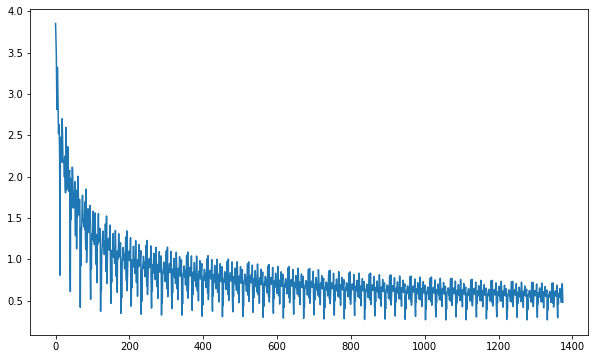

In [17]:
window_size = 50  # the bigger the window size, the smoother the loss curve
loss_mem_np = np.copy(loss_mem[:(len(loss_mem) // window_size)*window_size])
rest = np.copy(loss_mem[(len(loss_mem) // window_size)*window_size:])

loss_mov_avg = np.zeros((len(loss_mem_np) // window_size))
for i in range(0, len(loss_mem_np), window_size):
    loss_mov_avg[i//window_size] = np.average(loss_mem_np[i:i+window_size])
loss_mov_avg = np.concatenate((loss_mov_avg, [np.average(rest)]))
plt.figure(figsize=(10,6))
plt.plot(loss_mov_avg);
print(f'losses per epoch: {loss_per_epoch}')

In [31]:
generate(model)

import numpy + "/"
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     